In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')

In [2]:
matplotlib.rc('font', family='NanumGothic')
matplotlib.rc('axes', unicode_minus=False) 

In [3]:
df_train_x = pd.read_csv('/home/piai/test/df_train1_x.txt', usecols=lambda column: column != "Unnamed: 0")
df_train_y = pd.read_csv('/home/piai/test/df_train1_y.txt', usecols=lambda column: column != "Unnamed: 0")

df_valid_x = pd.read_csv('/home/piai/test/df_valid_x.txt', usecols=lambda column: column != "Unnamed: 0")
df_valid_y = pd.read_csv('/home/piai/test/df_valid_y.txt', usecols=lambda column: column != "Unnamed: 0")

In [4]:
df_train_x.drop('Year', axis=1, inplace=True)
df_valid_x.drop('Year', axis=1, inplace=True)

In [5]:
df_train_y = np.log1p(df_train_y)
df_valid_y = np.log1p(df_valid_y)

print(df_train_x)

      Kilometers_Driven  Owner_Type  Seats  Mileage(kmpl)  Engine(CC)  \
0                 33425           1    5.0          17.43      1396.0   
1                 62148           1    5.0          11.70      1796.0   
2                106000           1    8.0          12.99      2494.0   
3                 27000           1    5.0          17.97      1498.0   
4                 24350           2    5.0          19.81      1086.0   
...                 ...         ...    ...            ...         ...   
3959              45000           1    7.0          15.10      1196.0   
3960              43775           1    7.0          20.77      1248.0   
3961             102000           1    5.0          15.06      1995.0   
3962             100000           2    7.0          12.99      2494.0   
3963              21684           1    5.0          21.40      1197.0   

      Power(bhp)  Car_Age  Km_per_Year  Size  GDP_Group  Brand_Segment  \
0         105.50        9     3713.889     2     

In [6]:
#기본 옵션
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on training set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_valid_x, df_valid_y)))

Score on training set: 1.000
Score on test set: 0.851


과대적합 위험

# 그리드서치

In [7]:
para_depth = [depth for depth in range(1, 20)]
para_split = [n_split * 2 for n_split in range(2, 30)]
para_leaf = [n_leaf for n_leaf in range(1, 25)]

estimator = Decis  # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합ionTreeRegressor()
# 구하고자 하는 parameter와 범위
param_grid = {"criterion": ["mse", "friedman_mse", "mae"], "max_features": ["1.0", "sqrt", "log2"],
              "max_depth": para_depth, "min_samples_split": para_split,
              "min_samples_leaf": para_leaf}
# 설명력이 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=19,
                      max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=6)

best parameter: 
{'criterion': 'friedman_mse', 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6}

best score: 
0.864


# 잎사귀 최소 자료 수 

In [8]:
train_score = []; test_score = [ ]
# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf for n_leaf in range(1, 30)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_valid_x, df_valid_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_result = pd.DataFrame({
    'min_samples_leaf': para_leaf,
    'TrainScore': train_score,
    'TestScore': test_score
})

In [9]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.851
1,2,0.985,0.884
2,3,0.971,0.889
3,4,0.960,0.886
4,5,0.953,0.890
5,6,0.948,0.891
6,7,0.942,0.893
7,8,0.937,0.889
8,9,0.933,0.889
9,10,0.931,0.888


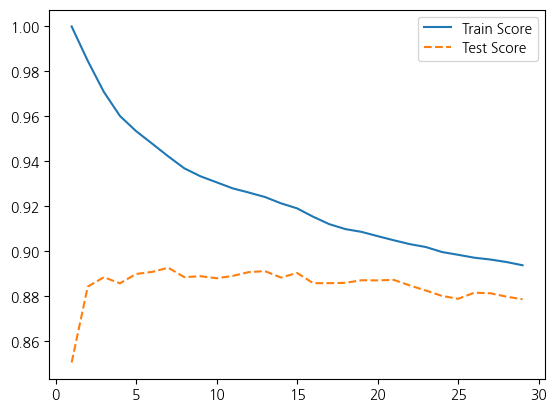

In [10]:
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# 노드의 최소 자료수

In [11]:
train_score = []; test_score = []
# min_samples_split: 분리 노드의 최소 자료 수 
para_split = [n_split * 2 for n_split in range(2, 20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=13
                                 , min_samples_split=v_min_samples_split )
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_valid_x, df_valid_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score



In [12]:
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.924,0.891
1,6,0.924,0.891
2,8,0.924,0.891
3,10,0.924,0.891
4,12,0.924,0.891
5,14,0.924,0.891
6,16,0.924,0.891
7,18,0.924,0.891
8,20,0.924,0.891
9,22,0.924,0.891


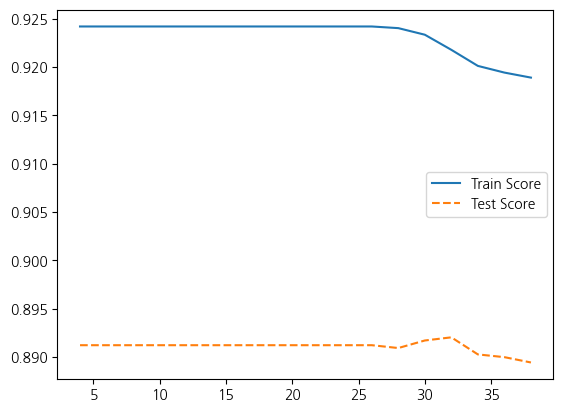

In [13]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

# Depth 최대 깊이

In [14]:
train_score = []; test_score = []
# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=13, min_samples_split=32
                                  , max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_valid_x, df_valid_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

In [15]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.479,0.461
1,2,0.645,0.619
2,3,0.761,0.748
3,4,0.822,0.815
4,5,0.867,0.851
5,6,0.890,0.874
6,7,0.905,0.883
7,8,0.912,0.891
8,9,0.917,0.892
9,10,0.920,0.892


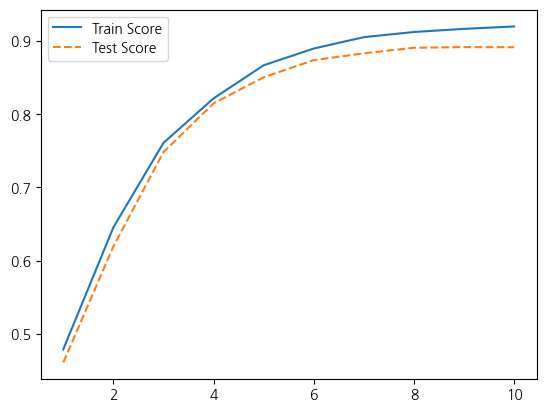

In [16]:
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

In [17]:
final_tree = DecisionTreeRegressor(max_depth=9, min_samples_split=32, min_samples_leaf=13, random_state=1234)
final_tree.fit(df_train_x, df_train_y)
print("Train Score:", final_tree.score(df_train_x, df_train_y))
print("Test Score:", final_tree.score(df_valid_x, df_valid_y))

Train Score: 0.9167325160868725
Test Score: 0.8917844612458815


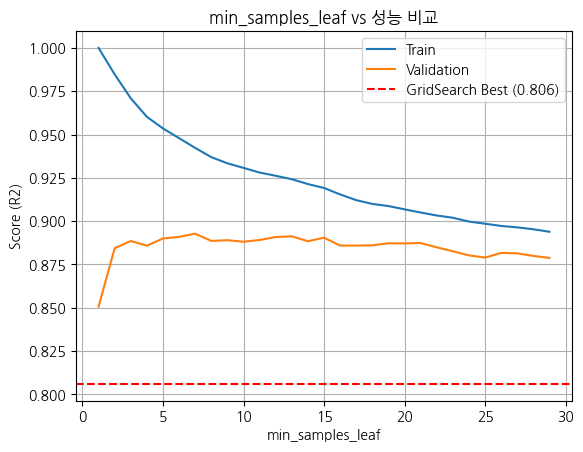

In [18]:
plt.plot(df_result['min_samples_leaf'], df_result['TrainScore'], label='Train')
plt.plot(df_result['min_samples_leaf'], df_result['TestScore'], label='Validation')
plt.axhline(y=0.806, color='r', linestyle='--', label='GridSearch Best (0.806)')
plt.xlabel('min_samples_leaf')
plt.ylabel('Score (R2)')
plt.title('min_samples_leaf vs 성능 비교')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

train_score = []
test_score = []
para_depth = range(1, 21)  # max_depth: 1 ~ 20까지 시도

for depth in para_depth:
    model = DecisionTreeRegressor(max_depth=depth, random_state=1234)
    model.fit(df_train_x, df_train_y)
    train_score.append(model.score(df_train_x, df_train_y))     # 학습 데이터 성능
    test_score.append(model.score(df_valid_x, df_valid_y))      # 검증 데이터 성능

df_result = pd.DataFrame({
    'max_depth': para_depth,
    'TrainScore': train_score,
    'TestScore': test_score
})

df_result


,max_depth,TrainScore,TestScore
0,1,0.478868,0.460936
1,2,0.645478,0.619419
2,3,0.760990,0.748453
3,4,0.822747,0.818277
4,5,0.868988,0.852798
5,6,0.895311,0.873121
6,7,0.918337,0.875246
7,8,0.935167,0.873549
8,9,0.948539,0.868350
9,10,0.960999,0.861588


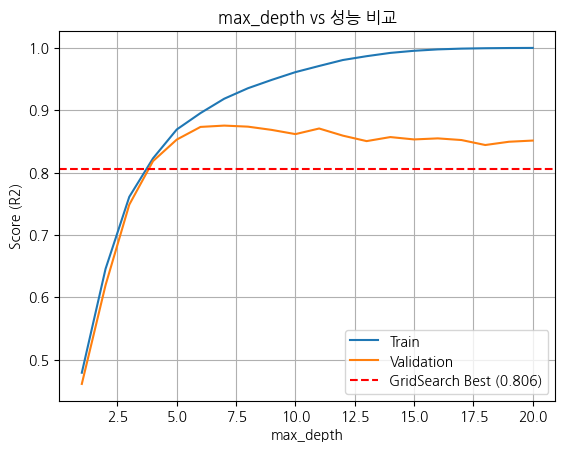

In [20]:
plt.plot(df_result['max_depth'], df_result['TrainScore'], label='Train')
plt.plot(df_result['max_depth'], df_result['TestScore'], label='Validation')
plt.axhline(y=0.806, color='r', linestyle='--', label='GridSearch Best (0.806)')
plt.xlabel('max_depth')
plt.ylabel('Score (R2)')
plt.title('max_depth vs 성능 비교')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

train_score = []
test_score = []
para_split = range(2, 21)  # 2 ~ 20 범위로 실험

for split in para_split:
    model = DecisionTreeRegressor(min_samples_split=split, random_state=1234)
    model.fit(df_train_x, df_train_y)
    train_score.append(model.score(df_train_x, df_train_y))      # 학습 성능
    test_score.append(model.score(df_valid_x, df_valid_y))       # 검증 성능

df_result = pd.DataFrame({
    'min_samples_split': para_split,
    'TrainScore': train_score,
    'TestScore': test_score
})

df_result

,min_samples_split,TrainScore,TestScore
0,2,0.999991,0.850628
1,3,0.995272,0.851272
2,4,0.992105,0.855760
3,5,0.988822,0.862520
4,6,0.985479,0.855225
5,7,0.979561,0.864962
6,8,0.976431,0.860107
7,9,0.974154,0.862719
8,10,0.970474,0.865717
9,11,0.967839,0.866628


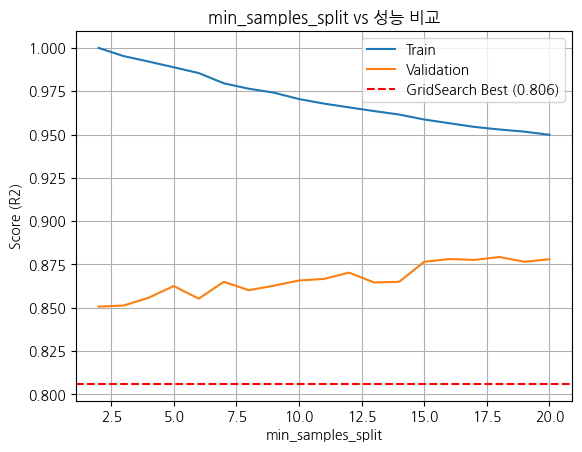

In [22]:
plt.plot(df_result['min_samples_split'], df_result['TrainScore'], label='Train')
plt.plot(df_result['min_samples_split'], df_result['TestScore'], label='Validation')
plt.axhline(y=0.806, color='r', linestyle='--', label='GridSearch Best (0.806)')
plt.xlabel('min_samples_split')
plt.ylabel('Score (R2)')
plt.title('min_samples_split vs 성능 비교')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# 115 Page
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state=1234, )
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

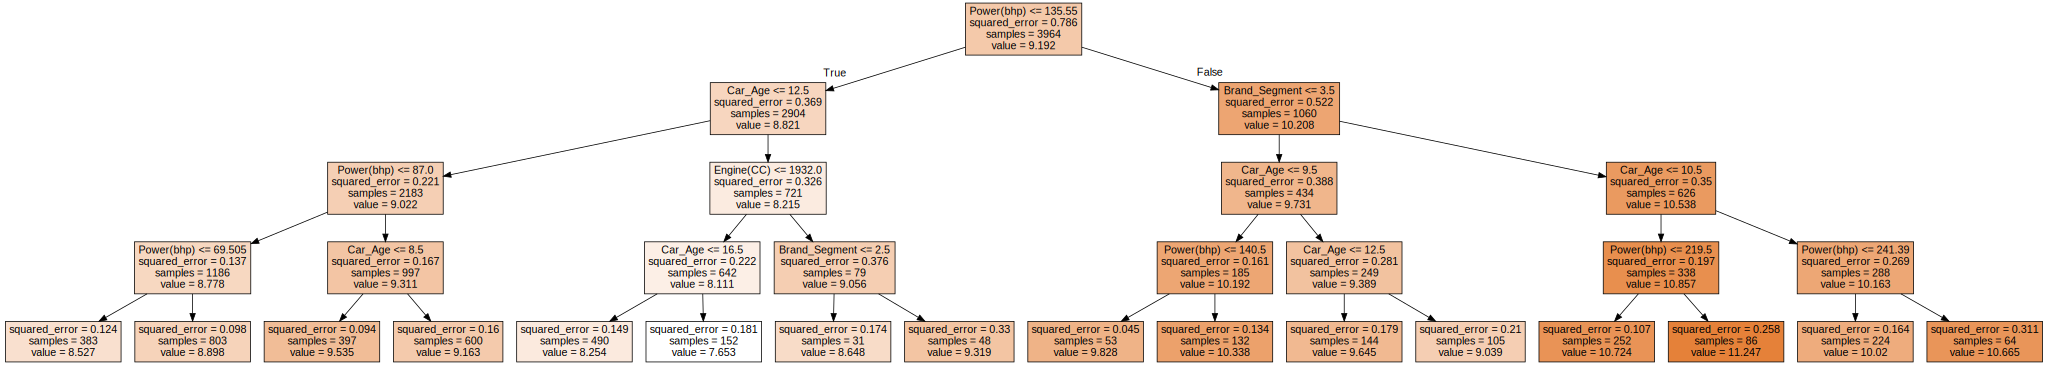

<Figure size 700x700 with 0 Axes>

In [27]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dot_graph = f.read()
plt.figure(figsize = (7, 7))
display(graphviz.Source(dot_graph))

In [28]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,Power(bhp),0.676
6,Car_Age,0.232
10,Brand_Segment,0.068
4,Engine(CC),0.024
0,Kilometers_Driven,0.000
1,Owner_Type,0.000
2,Seats,0.000
3,Mileage(kmpl),0.000
7,Km_per_Year,0.000
8,Size,0.000


Text(0, 0.5, '변수')

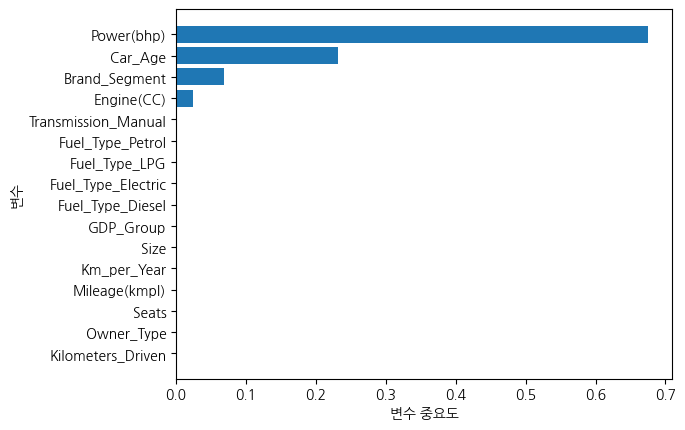

In [29]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")